In [1]:
# %load_ext autoreload
# %autoreload 2

import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
os.chdir("/nfs/homedirs/schwienb/project-4")

In [2]:
from src.data.mnist import MNISTDataModule, ConstantDataset, RandomDataset
from src.data.coco import COCODataModule
from src.models.coco_pixelcnn import COCOPixelCNN
from src.experiments.experiment import Experiment
from src.utils.pixelcnn import generate_images
import torch.nn.functional as F

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)


42

In [4]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.0000,
   patience=20,
   verbose=True,
)
model_params = {
    'background_subtraction': True,
#     'background_subtraction_value': 1e-5,
#     'position_encode': True,
#     'in_channels': 5,
#     'foreground_addition_value': 1.0,
#     'bg_aug_max': 0.5,
#     'kernel_size': 3,
#     'padding': 1,
#       'mse': True,
#       'fg_mse': True
    'concat_dataset': True,
#     'bg_aug': True
}
dataset_params = {
    'foreground_data_dir': '/nfs/students/winter-term-2020/project-4/yurtkulus/project-4/data/COCO/foreground_images/person', 
    'background_data_dir': '/nfs/students/winter-term-2020/project-4/yurtkulus/project-4/data/COCO/background_images/person', 
    'batch_size': 64,
    'convert_grayscale': True,
    'resize': True,
    'background_only': False,
    'resize_dim': (48,48)
}
model = COCOPixelCNN
dataset = COCODataModule


EarlyStopping mode set to min for monitoring val_loss.


In [5]:
exp = Experiment('PixelCNN_BgSub_D48_G_COCO_1', 
                 model=model, dataset=dataset, model_params=model_params, dataset_params=dataset_params, callbacks=[early_stop_callback])
exp.setup_new()


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [ ]:
exp.train()

/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: Found unsupported keys in the lr scheduler dict: ['name']
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

  | Name   | Type       | Params
--------------------------------------
0 | blocks | Sequential | 12 M  


In [ ]:
exp.save()

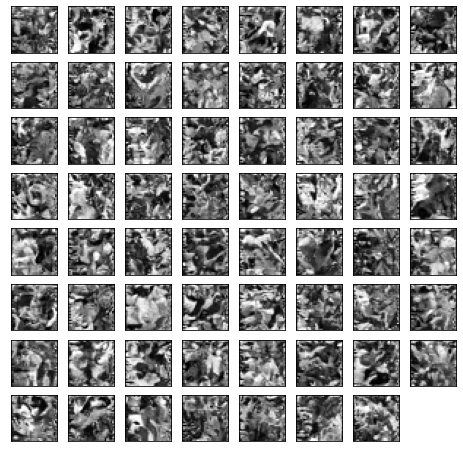

In [9]:
generate_images(exp.model, channels=1, img_dim=(32,32))

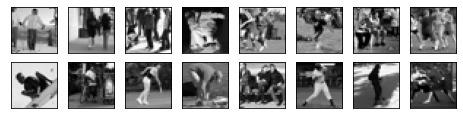

In [9]:
test = exp.dataset.test_dataloader()
fig = plt.figure(figsize=(8, 8))
i = 1
for img in iter(test):
    if i < 17:
        fig.add_subplot(8, 8, i)
        plt.imshow(img[0][0][0][0], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    i += 1
plt.show()